In [4]:
!pip install -Uqq fastbook

In [5]:
7+8

15

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [7]:
!pip install -U duckduckgo_search


  Using cached duckduckgo_search-5.3.0-py3-none-any.whl.metadata (18 kB)
Using cached duckduckgo_search-5.3.0-py3-none-any.whl (21 kB)
  Attempting uninstall: duckduckgo_search
    Found existing installation: duckduckgo_search 5.3.0b4
    Uninstalling duckduckgo_search-5.3.0b4:
      Successfully uninstalled duckduckgo_search-5.3.0b4


In [8]:
!pip install -U duckduckgo_search==5.3.0b4

  Using cached duckduckgo_search-5.3.0b4-py3-none-any.whl.metadata (18 kB)
Using cached duckduckgo_search-5.3.0b4-py3-none-any.whl (23 kB)
  Attempting uninstall: duckduckgo_search
    Found existing installation: duckduckgo_search 5.3.0
    Uninstalling duckduckgo_search-5.3.0:
      Successfully uninstalled duckduckgo_search-5.3.0


In [9]:
from duckduckgo_search import DDGS


In [10]:
urls = DDGS().images("maxi чай", max_results=5);

In [11]:
urls[0]

{'title': 'Купить Холодный чай Maxi чай зеленый лимон 1200 мл в кредит в Алматы ...',
 'image': 'https://resources.cdn-kaspi.kz/shop/medias/sys_master/images/images/h0e/hc7/46764257902622/maxi-zelenyj-limon-1-2-l-100234969-1-Container.png',
 'thumbnail': 'https://tse1.mm.bing.net/th?id=OIP.P2-illQwJh4tnxmT64kxSAHaHa&pid=Api',
 'url': 'https://kaspi.kz/shop/p/holodnyi-chai-maxi-zelenyi-limon-1200-ml-100234969/?c=750000000',
 'height': 787,
 'width': 787,
 'source': 'Bing'}

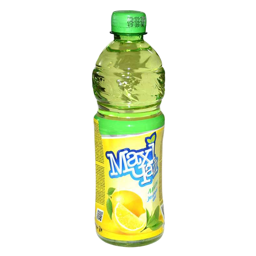

In [12]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0]["image"], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)


In [13]:
searches = 'maxi чай','қайрат нұртас'
path = Path('maxi_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    results = DDGS().images(o);
    # Initialize an empty list to store the URLs
    urls = []
    
    # Iterate through each dictionary in the results array
    for item in results:
        # Check if the 'image' attribute exists in the dictionary
        if 'image' in item:
            # Append the URL to the urls list
            urls.append(item['image'])

    
    download_images(dest, urls=urls)


In [14]:
!dir

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 3ED7-FBA8

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\taizh\Documents

04/19/2024  02:36 AM    <DIR>          .
04/14/2024  09:54 AM    <DIR>          ..
04/14/2024  01:32 AM    <DIR>          .ipynb_checkpoints
04/19/2024  02:36 AM           329,229 bird.jpg
04/18/2024  01:07 AM        46,964,670 export.pkl
08/17/2023  05:57 PM    <DIR>          FlashPrint
06/29/2023  08:59 PM             2,771 main.py
04/18/2024  12:55 AM    <DIR>          maxi_or_not
04/19/2024  02:36 AM             9,312 petProject.ipynb
04/14/2024  09:58 AM    <DIR>          plant
04/14/2024  11:48 AM    <DIR>          Plant-Disease-Detection
04/14/2024  04:44 PM    <DIR>          skywatch
07/20/2023  05:42 PM    <DIR>          tenderium
               4 д ©«®ў     47,305,982 Ў ©в
               9 Ї Ї®Є  250,288,222,208 Ў ©в бў®Ў®¤­®


In [15]:
maxis = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = maxis.dataloaders(path)

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

UnidentifiedImageError: cannot identify image file 'C:\\Users\\taizh\\Documents\\maxi_or_not\\maxi чай\\de03c960-0b73-4bdb-8571-515b3925a705.svg'

In [ ]:
maxis = maxis.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = maxis.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
maxis = maxis.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = maxis.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
maxis = maxis.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = maxis.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
maxis = maxis.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = maxis.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(1, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.export()

In [4]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [5]:
learn_inf = load_learner('export.pkl')

In [6]:
learn_inf.predict('maxi_or_not/қайрат нұртас/0c7d299e-b60d-4ca3-8260-71fcfa149435.jpg')

('қайрат нұртас', tensor(1), tensor([0.0151, 0.9849]))

In [ ]:
# DEPLOYMENT

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila


In [38]:
!pip install gradio==3.43.1

   ---------------------------------------- 0.0/20.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.1 MB 330.3 kB/s eta 0:01:01
   ---------------------------------------- 0.1/20.1 MB 409.6 kB/s eta 0:00:49
   ---------------------------------------- 0.1/20.1 MB 602.4 kB/s eta 0:00:34
   ---------------------------------------- 0.2/20.1 MB 787.7 kB/s eta 0:00:26
    --------------------------------------- 0.3/20.1 MB 983.9 kB/s eta 0:00:21
    --------------------------------------- 0.4/20.1 MB 1.2 MB/s eta 0:00:18
   - -------------------------------------- 0.6/20.1 MB 1.5 MB/s eta 0:00:14
   - -------------------------------------- 0.6/20.1 MB 1.5 MB/s eta 0:00:14
   -- ------------------------------------- 1.0/20.1 MB 2.2 MB/s eta 0:00:09
   -- ------------------------------------- 1.1/20.1 MB 2.3 MB/s eta 0:00:09
   -- ----

In [13]:
categories = ("maxi", "kairat")

def classify_image(img):
    pred,idx,probs = learn_inf.predict(img)
    return dict(zip(categories, map(float, probs)))

In [14]:
import gradio as gr


In [16]:
examples = ["maxi.jpg", "kairat.jpeg"]
intf = gr.Interface(fn=classify_image, inputs=gr.inputs.Image(shape=(192, 192)), outputs=gr.outputs.Label(), examples=examples)
intf.launch(inline=False,share=True)

C:\Users\taizh\AppData\Local\Temp\ipykernel_8708\539945578.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  intf = gr.Interface(fn=classify_image, inputs=gr.inputs.Image(shape=(192, 192)), outputs=gr.outputs.Label(), examples=examples)
C:\Users\taizh\AppData\Local\Temp\ipykernel_8708\539945578.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  intf = gr.Interface(fn=classify_image, inputs=gr.inputs.Image(shape=(192, 192)), outputs=gr.outputs.Label(), examples=examples)
C:\Users\taizh\AppData\Local\Temp\ipykernel_8708\539945578.py:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  intf = gr.Interface(fn=classify_image, inputs=gr.inputs.Image(shape=(192, 192)), outputs=gr.outputs.Label(), examples=examples)
C:\Users\taizh\A

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://14f50b197e222567c5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
